# Seqence to sequence(Seq2seq)(https://arxiv.org/abs/1409.3215)

NLP분야에서 seq2seq는 기계 번역, 문장 생성, 질의응답, 메일 자동 응답 등에 활용하는 모델

기계번역과 같은 task에서 문제는 **입력과 출력에 대한 Sequence를 고정할 수 없다는 문제**

각 시퀀스에 대한 길이를 미리 알 수 없으며, 기계 번역과 같이 입력 시퀀스를 출력 시퀀스를 생성하는 문제를 해결하기 위해 seq2seq이 제안되었음.

## Seq2Seq Architecture

RNN 계열의 모델을 활용한 새로운 architecture라고 할 수 있음.seq2seq 구조는 아래와 같이 간단한 구조를 가짐.

<img src='https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-24_at_7.47.32_PM.png'>

그림을 기준으로 입력 시퀀스를 처리하는 부분을 인코더(Encoder), 출력 시퀀스를 생성하는 부분을 디코더(Decoder)

논문에서는 입력 시퀀스를 처리하는 인코더와 출력 시퀀스를 생성하는 디코더에 LSTM 모델을 각각 사용하였습니다.

<img src='https://heekangpark.github.io/assets/img/nlp/attention-seq2seq.png'>
출처 : https://heekangpark.github.io/nlp/attention#fn:2

**인코더 부분에서는 입력 시퀀스를 LSTM(RNN 계열)을 통해 hidden state를 넘겨주면서 마지막 단계의 hidden state를 디코더에 전달**.

**마지막 단계의 hidden state를 context vector라고 하며 이 정보를 입력 시퀀스, 즉 입력 문장에 대한 압축된 정보라고 생각할 수 있음**.

디코더 부분에서는 전달받은 context vector를 통해 다음 나올 단어를 예측함. 그리고 예측 된 단어가 다시 다음 시점의 입력으로 들어가 계속 예측하는 방식.


**인코더에서는 입력 시퀀스에 대한 정보를 hidden state로 넘겨 context vector를 만든다. 그리고 디코더 부분에서는 context vector와 다음 시점에 나올 단어를 예측하고, 예측된 단어를 다시 input으로 넣어서 예측함.**

<img src='https://mblogthumb-phinf.pstatic.net/MjAyMDA2MTJfMjEz/MDAxNTkxOTQzODAyNjkz.gpGCrP6MqIRn0by3L_Bf0BHZV---dgXcoDAC2RzGvOMg.6qd7AmQlqzbRHVJChvvnb7wu8b7nyLEMjjx9jvJyDXQg.PNG.winddori2002/5.PNG?type=w800'>

출처 : CS224N

기계번역 분야에서 **입/출력 시퀀스가 가변적이기 때문에 token 개념을 도입**함. **논문에서는 각 입력/출력 끝 부분에 문장의 끝을 알리는 EOS**(End of sequence)를 사용함.

위의 그림처럼 **출력 시퀀스에 각 시작과 끝을 알리는 SOS, EOS 토큰을 적용할 수 있습**니다. 과정을 살펴보면 인코더에서 만든 context vector(최종 hidden state)와 SOS 토큰이 input으로 첫 단어를 예측합니다. 그리고 과정을 반복하면서 마지막으로 예측된 단어가 EOS라면 최종 출력 시퀀스가 완성됩니다.  seq2seq에서는 이러한 방식을 통해 가변적인 시퀀스의 길이를 처리할 수 있습니다.

**인코더에서 만든 context vector가 디코더 부분에서 처음 은닉상태로 들어가 새로운 hidden state로 계속해서 갱신될 수도, 매 입력 시점마다 context vector가 들어갈 수도 있습니다.**

<center>
<img src='https://wikidocs.net/images/page/24996/decodernextwordprediction.PNG'>
</center>

출처 : https://wikidocs.net/24996


- Teacher Forcing(교사 강요)
    - 디코더의 역할을 봐보면, 디코더는 t-1시점의 예측된 단어를 다시 input으로 사용해 t시점 단어를 예측했습니다.
    - 예측 단계에서는 합리적이지만 학습을 할 때도 똑같은 방식으로 한다면 예측을 틀리게 하면서 연쇄작용으로 디코더 전체의 예측과 학습이 비효율적으로 진행될 것.

이러한 문제를 해결하기 위해서 **학습을 할 때는 예측값이 input이 아닌 실제값을 input으로 적용하여 학습하는 교사 강요 방법을 적용**.

<img src='https://mblogthumb-phinf.pstatic.net/MjAyMDAxMzFfNDEg/MDAxNTgwMzk5NTU2MjMw.mbxg2RsP2Nt8q_xJStgPYsDosP2bmKmgz1D3EBXldJIg.XPimuUz1cowL21o6HqzhKOv0ZJO3QDruhSY-cqFmkqQg.PNG.sooftware/image.png?type=w800'>

출처 : https://blog.naver.com/sooftware/221790750668

### 추가 학습 전략

#### 1. Greedy decoding

    단순히 특정 시점에서 나올 단어의 확률값이 가장 높은 단어들만 출력.

    어느 정도 합리적이지만 이 방식의 문제점은 undo 기능을 할 수 없다는 점인데, 한번 예측을 잘못하면 그것이 돌이킬 수 없고 연쇄적으로 오류가 생길 수 있다는 문제점.

- Exhaustive search decoding은 디코더 시점에서 모든 가능한 단어를 만드는 것. 정확할 수 있겠지만 너무 많은 시간과 비용이 듦.
    - Exhaustive search는 현 시점에서 단어를 예측할 때 다음에 순차적으로 올 단어들의 joint probability가 가장 크게되도록 하는 단어를 찾는다.

$P(y|x) = p(y_1|x)p(y_2|y_1,x)p(y_3|y_2,y_2,x),\dots,p(y_T|y_1,\dots,y_{T-1},x) = \Pi_{1}^T P(y_t|y_1,\dots,y_{t-1},x)$
    
예를 들어, p(y1|x)를 예측할 때 그 때는 가장 큰 확률값을 갖지 않는 단어이더라도 p(y2|x)부터 p(yt|y1, ···, yt-1,x)의 확률이 가장 클 수 있는 단어를 예측하는 것이다.

그러나 이러한 방법을 위해서는 vabcabulary size가 V이고, time step이 t일 때, V**t만큼의 계산을 수행해야 한다.
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbeDOGc%2FbtrexmpVkF4%2FjGd86vzXoH6xudFhn6ncN0%2Fimg.png'>

복잡도가 너무 커지는 이 문제를 보완하기 위한 방법이 바로 Beam search이다.


#### 2. Beam Search decoding

- Greedy decoding과 Exhausitive search 두 방법을 적절하게 타협한 방법
    - Exhausitive search : 완전탐색은 간단히 가능한 모든 경우의 수를 다 체크해서 정답을 찾는 방법

<img src='https://hyunkyung12.github.io/files/argmax%20decoding.PNG'>

디코더의 각 시점마다 k개의 가능성 있는 출력들을 유지하는 것. k는 beam size라고 함. 각 나올 수 있는 출력은 log probabilitry로 score를 갖게 됨. score 값은 음수이면 높은 값일 수록 좋은 것을 의미함.

<img src='https://mblogthumb-phinf.pstatic.net/MjAyMDA2MTJfMTUx/MDAxNTkxOTUwMTUzODEx.f7FSv8Rv1dBcHhhDjD_JZBYaeWE6inmKjdBc57_h_kIg.yHS-IpzZVKkdIZlrK1S2hdvaZfUmMKovNo8A9aLQ540g.PNG.winddori2002/7.PNG?type=w800'>
    
각 셀을 거칠 때 마다 최대 확률 값을 갖는 단어를 출력값으로 학습하는 것. 중간에 잘못 예측한 단어가 있으면 다음 단어의 학습에도 영향을 주기 때문에 번역에서는 큰 문제가 될 수 있음.

<img src='https://hyunkyung12.github.io/files/beam%20search%20decoding.PNG'>

참고 :  https://amber-chaeeunk.tistory.com/94

<img src='https://tensorflowkorea.files.wordpress.com/2017/04/68747470733a2f2f332e62702e626c6f6773706f742e636f6d2f2d3350626a5f64767430566f2f562d71652d4e6c365035492f41414141414141414251632f7a305f365774565774764152744d6b3069395f41744c6579794779563641.gif'>

출처 : https://tensorflow.blog/2017/04/14/tf-seq2seq-open-source-seq2seq-framework-in-tf/

### Seq2Seq 모델의 한계


Seq2Seq 모델은 번역(translation), 챗봇 등의 task에서 높은 성능을 보였다. 하지만 Seq2Seq 모델은 커다란 한계가 있었다.

- 입력 시퀸스의 모든 정보를 하나의 고정된 크기의 벡터(컨텍스트 벡터)에 다 압축 요약하려 하다 보니 정보의 손실이 생길 수밖에 없다. 특히 시퀸스의 길이가 길다면 정보의 손실이 더 커진다.
- RNN 구조로 만들어진 모델이다 보니, 필연적으로 gradient vaninshing/exploding 현상이 발생한다.

<img src='https://blog.kakaocdn.net/dn/0ZmwT/btq4335rw1Z/U4NZTAEyn6VRPKmwXzpi81/img.gif'>

출처 : https://trungtran.io/2019/03/29/neural-machine-translation-with-attention-mechanism/

**이번 실습에서는 프랑스-영어 병렬 코퍼스인 fra-eng.zip 파일을 사용**

실제 성능이 좋은 기계 번역기를 구현하려면 정말 방대한 데이터가 필요하므로 여기서는 방금 배운 seq2seq를 실습해보는 수준에서 아주 간단한 기계 번역기를 구축

 기계 번역기를 훈련시키기 위해서는 훈련 데이터로 병렬 코퍼스(parallel corpus)가 필요합니다. 병렬 코퍼스란, 두 개 이상의 언어가 병렬적으로 구성된 코퍼스를 의미합니다

 - 다운로드 : http://www.manythings.org/anki/

In [ ]:
import re
import os
import unicodedata
import urllib3
import zipfile
import shutil
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.models import Model

## Download the data


In [ ]:
!wget http://www.manythings.org/anki/fra-eng.zip

--2024-04-19 05:16:14--  http://www.manythings.org/anki/fra-eng.zip
Resolving www.manythings.org (www.manythings.org)... 173.254.30.110
Connecting to www.manythings.org (www.manythings.org)|173.254.30.110|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7943074 (7.6M) [application/zip]
Saving to: ‘fra-eng.zip’

fra-eng.zip         100%[===================>]   7.57M  14.4MB/s    in 0.5s    

2024-04-19 05:16:14 (14.4 MB/s) - ‘fra-eng.zip’ saved [7943074/7943074]



In [ ]:
zipfilename = '/content/fra-eng.zip'

with zipfile.ZipFile(zipfilename, 'r') as zip_ref:
    zip_ref.extractall('.')

## Configuration


In [ ]:
BATCH_SIZE = 64  # Batch size for training.
EPOCHS = 100  # Number of epochs to train for.
HIDDEN_DIM = 256  # Latent dimensionality of the encoding space.
EMBEDDING_DIM = 64
NUM_SAMPLES = 33000  # Number of samples to train on.

## Prepare the data


데이터셋을 다운로드한 후에 데이터를 준비하고자 다음의 단계를 수행합니다.

1. 각 문장에 start와 end 토큰을 추가합니다.
2. 특정 문자를 제거함으로써 문장을 정리합니다.
3. 단어 인덱스와 아이디(ID) 인덱스를 생성합니다. (단어 → 아이디(ID), 아이디(ID) → 단어로 매핑된 딕셔너리).
4. 각 문장을 입력층의 최대 길이만큼 패딩(padding)을 수행합니다.

In [ ]:
def unicode_to_ascii(s):
  # 프랑스어 악센트(accent) 삭제
  # 예시 : 'déjà diné' -> deja dine
  return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

- 검색하면서 normalize 부분에서 'NFD'와 'NFC'는 각각 윈도우와 맥의 파일 이름 저장 방식

- 'Mn'은 'Mark, Nonspacing'인데 구글링해보면 발음구별기호

In [ ]:
def preprocess_sentence(sent):
  # 악센트 삭제 함수 호출
  sent = unicode_to_ascii(sent.lower())

  # 단어와 구두점 사이에 공백을 만듭니다.
  # Ex) "he is a boy." => "he is a boy ."
  sent = re.sub(r"([?.!,¿])", r" \1", sent) # ¿ : 에스파냐어(등등, 의문문 처음에 사용.)

  # (a-z, A-Z, ".", "?", "!", ",") 이들을 제외하고는 전부 공백으로 변환합니다.
  sent = re.sub(r"[^a-zA-Z!.?]+", r" ", sent)

  # 다수 개의 공백을 하나의 공백으로 치환
  sent = re.sub(r"\s+", " ", sent)
  return sent

훈련 과정에서 교사 강요(Teacher Forcing)을 사용할 예정이므로, 훈련 시 사용할 디코더의 입력 시퀀스와 실제값. 즉, 레이블에 해당되는 출력 시퀀스를 따로 분리하여 저장합니다. 입력 시퀀스에는 시작을 의미하는 토큰인 <sos>를 추가하고, 출력 시퀀스에는 종료를 의미하는 토큰인 <eos>를 추가합니다.

- 교사 강요란?
    - 훈련 과정에서는 이전 시점의 디코더 셀의 출력을 현재 시점의 디코더 셀의 입력으로 넣어주지 않고, 이전 시점의 실제값을 현재 시점의 디코더 셀의 입력값으로 하는 방법을 사용할 겁니다. 그 이유는 이전 시점의 디코더 셀의 예측이 틀렸는데 이를 현재 시점의 디코더 셀의 입력으로 사용하면 현재 시점의 디코더 셀의 예측도 잘못될 가능성이 높고 이는 연쇄 작용으로 디코더 전체의 예측을 어렵게 합니다. 이런 상황이 반복되면 훈련 시간이 느려집니다. 만약 이 상황을 원하지 않는다면 이전 시점의 디코더 셀의 예측값 대신 실제값을 현재 시점의 디코더 셀의 입력으로 사용하는 방법을 사용할 수 있습니다. 이와 같이 RNN의 모든 시점에 대해서 이전 시점의 예측값 대신 실제값을 입력으로 주는 방법을 교사 강요라고 합니다.

In [ ]:
# dataset
eng_corpus, fra_corpus = [], []
with open("fra.txt", "r") as lines:
    for i, line in enumerate(lines):
        # source 데이터와 target 데이터 분리
        tar_line, src_line, _ = line.strip().split('\t')

        eng_corpus.append(tar_line)
        fra_corpus.append(src_line)

print(len(eng_corpus), eng_corpus[:10])
print(len(fra_corpus), fra_corpus[:10])
# _ : CC-BY 2.0 (France) Attribution: tatoeba.org #9821215 (DJ_Saidez) & #11726136 (Micsmithel)

232736 ['Go.', 'Go.', 'Go.', 'Go.', 'Hi.', 'Hi.', 'Run!', 'Run!', 'Run!', 'Run!']
232736 ['Va !', 'Marche.', 'En route !', 'Bouge !', 'Salut !', 'Salut.', 'Cours\u202f!', 'Courez\u202f!', 'Prenez vos jambes à vos cous !', 'File !']
CC-BY 2.0 (France) Attribution: tatoeba.org #9821215 (DJ_Saidez) & #11726136 (Micsmithel)


In [ ]:
encoder_input, decoder_input, decoder_target = [], [], []

for i, (src_line, tar_line) in enumerate(zip(fra_corpus, eng_corpus)):
    # source 데이터 전처리
    src_line = [w for w in preprocess_sentence(src_line).split()]

    # target 데이터 전처리
    tar_line = preprocess_sentence(tar_line)
    print('tar_line : ', tar_line)

    tar_line_in = [w for w in ("<sos> " + tar_line).split()]  # teacher forcing을 위한 정답셋
    print('tar_line in : ', tar_line_in)

    tar_line_out = [w for w in (tar_line + " <eos>").split()]
    print('tar_line out: ', tar_line_out)

    encoder_input.append(src_line) # 클리닝
    decoder_input.append(tar_line_in) # 클리닝 + sos
    decoder_target.append(tar_line_out) # 클리닝 + eos

    if i == NUM_SAMPLES - 1:
        break
    break

tar_line :  go .
tar_line in :  ['<sos>', 'go', '.']
tar_line out:  ['go', '.', '<eos>']


In [ ]:
def load_preprocessed_data(eng_corpus, fra_corpus):
    encoder_input, decoder_input, decoder_target = [], [], []

    for i, (src_line, tar_line) in enumerate(zip(fra_corpus, eng_corpus)):
        # source 데이터 전처리
        src_line = [w for w in preprocess_sentence(src_line).split()]

        # target 데이터 전처리
        tar_line = preprocess_sentence(tar_line)
        tar_line_in = [w for w in ("<sos> " + tar_line).split()]  # teacher forcing을 위한 정답셋
        tar_line_out = [w for w in (tar_line + " <eos>").split()]

        encoder_input.append(src_line) # 클리닝
        decoder_input.append(tar_line_in) # 클리닝 + sos
        decoder_target.append(tar_line_out) # 클리닝 + eos

        if i == NUM_SAMPLES - 1:
            break

    return encoder_input, decoder_input, decoder_target

In [ ]:
# 전처리 테스트
en_sent = u"Have you had dinner?"
fr_sent = u"Avez-vous déjà diné?"

print('전처리 전 영어 문장 :', en_sent)
print('전처리 후 영어 문장 :',preprocess_sentence(en_sent))
print('전처리 전 프랑스어 문장 :', fr_sent)
print('전처리 후 프랑스어 문장 :', preprocess_sentence(fr_sent))

전처리 전 영어 문장 : Have you had dinner?
전처리 후 영어 문장 : have you had dinner ?
전처리 전 프랑스어 문장 : Avez-vous déjà diné?
전처리 후 프랑스어 문장 : avez vous deja dine ?


In [ ]:
sents_fra_in, sents_en_in, sents_en_out  = load_preprocessed_data(eng_corpus, fra_corpus)

In [ ]:
print('인코더의 입력 :',sents_fra_in[-5:])
print('디코더의 입력 :',sents_en_in[-5:])
print('디코더의 레이블 :',sents_en_out[-5:])

인코더의 입력 : [['il', 'me', 'fit', 'attendre', '.'], ['il', 'm', 'a', 'fait', 'attendre', '.'], ['il', 'continua', 'a', 'chanter', '.'], ['il', 'est', 'reste', 'tout', 'a', 'fait', 'calme', '.'], ['il', 'tapa', 'dans', 'le', 'ballon', '.']]
디코더의 입력 : [['<sos>', 'he', 'kept', 'me', 'waiting', '.'], ['<sos>', 'he', 'kept', 'me', 'waiting', '.'], ['<sos>', 'he', 'kept', 'on', 'singing', '.'], ['<sos>', 'he', 'kept', 'quite', 'calm', '.'], ['<sos>', 'he', 'kicked', 'the', 'ball', '.']]
디코더의 레이블 : [['he', 'kept', 'me', 'waiting', '.', '<eos>'], ['he', 'kept', 'me', 'waiting', '.', '<eos>'], ['he', 'kept', 'on', 'singing', '.', '<eos>'], ['he', 'kept', 'quite', 'calm', '.', '<eos>'], ['he', 'kicked', 'the', 'ball', '.', '<eos>']]


단어집합을 생성하겠습니다.

In [ ]:
# 프랑스어 (encoder)
tokenizer_enc = Tokenizer(filters="", lower=False)
tokenizer_enc.fit_on_texts(sents_fra_in)

# 인코더 데이터
encoder_input = tokenizer_enc.texts_to_sequences(sents_fra_in)

In [ ]:
# 영어 (decoder)
tokenizer_dec = Tokenizer(filters="", lower=False)
tokenizer_dec.fit_on_texts(sents_en_in)
tokenizer_dec.fit_on_texts(sents_en_out)

# 디코더 데이터
decoder_input = tokenizer_dec.texts_to_sequences(sents_en_in)
decoder_target = tokenizer_dec.texts_to_sequences(sents_en_out)

In [ ]:
print(encoder_input[-5:])
print(decoder_input[-5:])
print(decoder_target[-5:])

[[11, 28, 773, 295, 1], [11, 40, 6, 44, 295, 1], [11, 1216, 6, 261, 1], [11, 3, 120, 46, 6, 44, 195, 1], [11, 7875, 106, 13, 1979, 1]]
[[2, 18, 155, 19, 1414, 1], [2, 18, 155, 19, 1414, 1], [2, 18, 155, 47, 531, 1], [2, 18, 155, 403, 288, 1], [2, 18, 1222, 17, 697, 1]]
[[18, 155, 19, 1414, 1, 3], [18, 155, 19, 1414, 1, 3], [18, 155, 47, 531, 1, 3], [18, 155, 403, 288, 1, 3], [18, 1222, 17, 697, 1, 3]]


샘플은 총 33,000개 존재하며 영어 문장의 길이는 8, 프랑스어 문장의 길이는 16입니다. 단어 집합의 크기를 정의합니다.


In [ ]:
print(tokenizer_enc.word_index)
print(tokenizer_dec.word_index)

{'.': 1, 'je': 2, 'est': 3, '?': 4, 'tom': 5, 'a': 6, 'vous': 7, '!': 8, 'pas': 9, 'j': 10, 'il': 11, 'nous': 12, 'le': 13, 'ai': 14, 'tu': 15, 'de': 16, 'ne': 17, 'c': 18, 'suis': 19, 'la': 20, 'l': 21, 'un': 22, 'en': 23, 'ce': 24, 'n': 25, 'etes': 26, 'ca': 27, 'me': 28, 'que': 29, 'une': 30, 'moi': 31, 'les': 32, 'es': 33, 'd': 34, 'sommes': 35, 's': 36, 'y': 37, 't': 38, 'sont': 39, 'm': 40, 'etait': 41, 'elle': 42, 'ils': 43, 'fait': 44, 'qui': 45, 'tout': 46, 'as': 47, 'aime': 48, 'elles': 49, 'des': 50, 'mon': 51, 'te': 52, 'bien': 53, 'toi': 54, 'ici': 55, 'avez': 56, 'du': 57, 'tres': 58, 'ete': 59, 'besoin': 60, 'peux': 61, 'avons': 62, 'faire': 63, 'qu': 64, 'va': 65, 'on': 66, 'se': 67, 'cela': 68, 'air': 69, 'faut': 70, 'fais': 71, 'personne': 72, 'veux': 73, 'votre': 74, 'etais': 75, 'ont': 76, 'ton': 77, 'aller': 78, 'monde': 79, 'tous': 80, 'trop': 81, 'ou': 82, 'au': 83, 'maintenant': 84, 'ma': 85, 'adore': 86, 'train': 87, 'soyez': 88, 'comment': 89, 'bon': 90, 'mal'

In [ ]:
SRC_VOCAB_SIZE = len(tokenizer_enc.word_index) + 1
TAR_VOCAB_SIZE = len(tokenizer_dec.word_index) + 1

print(f"영어 단어 집합의 크기 : {SRC_VOCAB_SIZE}, 프랑스어 단어 집합의 크기 : {TAR_VOCAB_SIZE}")

영어 단어 집합의 크기 : 7876, 프랑스어 단어 집합의 크기 : 4487


각 문장을 입력층의 최대 길이만큼 패딩(padding)을 수행합니다.

In [ ]:
encoder_input = pad_sequences(encoder_input, padding='post')
decoder_input = pad_sequences(decoder_input, padding='post')
decoder_target = pad_sequences(decoder_target, padding='post')

In [ ]:
print('인코더의 입력의 크기(shape) :',encoder_input.shape)
print('디코더의 입력의 크기(shape) :',decoder_input.shape)
print('디코더의 레이블의 크기(shape) :',decoder_target.shape)

# 변수 저장
MAX_ENC_LEN, MAX_DEC_LEN = encoder_input.shape[1], decoder_input.shape[1]

인코더의 입력의 크기(shape) : (33000, 15)
디코더의 입력의 크기(shape) : (33000, 8)
디코더의 레이블의 크기(shape) : (33000, 8)


단어로부터 정수를 얻는 딕셔너리와 정수로부터 단어를 얻는 딕셔너리를 각각 만들어줍니다. 이들은 훈련을 마치고 예측값과 실제값을 비교하는 단계에서 사용합니다.

In [ ]:
src2idx = tokenizer_enc.word_index  # word : idx
idx2src = tokenizer_enc.index_word  # idx : word
tar2idx = tokenizer_dec.word_index # word : idx
idx2tar = tokenizer_dec.index_word # idx : word

In [ ]:
print(src2idx)
print(idx2src)
print(tar2idx)
print(idx2tar)

{'.': 1, 'je': 2, 'est': 3, '?': 4, 'tom': 5, 'a': 6, 'vous': 7, '!': 8, 'pas': 9, 'j': 10, 'il': 11, 'nous': 12, 'le': 13, 'ai': 14, 'tu': 15, 'de': 16, 'ne': 17, 'c': 18, 'suis': 19, 'la': 20, 'l': 21, 'un': 22, 'en': 23, 'ce': 24, 'n': 25, 'etes': 26, 'ca': 27, 'me': 28, 'que': 29, 'une': 30, 'moi': 31, 'les': 32, 'es': 33, 'd': 34, 'sommes': 35, 's': 36, 'y': 37, 't': 38, 'sont': 39, 'm': 40, 'etait': 41, 'elle': 42, 'ils': 43, 'fait': 44, 'qui': 45, 'tout': 46, 'as': 47, 'aime': 48, 'elles': 49, 'des': 50, 'mon': 51, 'te': 52, 'bien': 53, 'toi': 54, 'ici': 55, 'avez': 56, 'du': 57, 'tres': 58, 'ete': 59, 'besoin': 60, 'peux': 61, 'avons': 62, 'faire': 63, 'qu': 64, 'va': 65, 'on': 66, 'se': 67, 'cela': 68, 'air': 69, 'faut': 70, 'fais': 71, 'personne': 72, 'veux': 73, 'votre': 74, 'etais': 75, 'ont': 76, 'ton': 77, 'aller': 78, 'monde': 79, 'tous': 80, 'trop': 81, 'ou': 82, 'au': 83, 'maintenant': 84, 'ma': 85, 'adore': 86, 'train': 87, 'soyez': 88, 'comment': 89, 'bon': 90, 'mal'

테스트 데이터를 분리하겠습니다. 인코더 input, 디코더 input, 디코더 output이 동일하게 분리되어야 하기 때문에 랜덤한 정수배열을 만들어 직접 나누겠습니다.

우선 랜덤하게 시퀀스를 섞습니다.

In [ ]:
# 랜덤 인덱스 생성
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print('랜덤 시퀀스 :',indices)

# 랜덤하게 섞기
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

print()
print(decoder_input[indices[0]])
print(decoder_target[indices[0]])

랜덤 시퀀스 : [ 3632 28195  4045 ...  3760  3346 15609]

[  2   4  54  23 310   1   0   0]
[  4  54  23 310   1   3   0   0]


`<sos>` `<eos>` 토큰을 제외한 다른 단어들은 동일한 인덱스를 갖고 있어야 합니다.

10%의 데이터를 test데이터로 분리하겠습니다.

In [ ]:
n_of_val = int(NUM_SAMPLES*0.1) # 900

# train data
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

# test data
encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

In [ ]:
print('훈련 source 데이터의 크기 :',encoder_input_train.shape)
print('훈련 target 데이터의 크기 :',decoder_input_train.shape)
print('훈련 target 레이블의 크기 :',decoder_target_train.shape)
print('테스트 source 데이터의 크기 :',encoder_input_test.shape)
print('테스트 target 데이터의 크기 :',decoder_input_test.shape)
print('테스트 target 레이블의 크기 :',decoder_target_test.shape)

훈련 source 데이터의 크기 : (29700, 15)
훈련 target 데이터의 크기 : (29700, 8)
훈련 target 레이블의 크기 : (29700, 8)
테스트 source 데이터의 크기 : (3300, 15)
테스트 target 데이터의 크기 : (3300, 8)
테스트 target 레이블의 크기 : (3300, 8)


## 모델링 (학습)

#### 1. 인코더

인코더를 설계합니다.

LSTM 레이어를 사용하므로 context vector는 `hidden state`와 `cell state` 총 2가지 모두를 사용합니다.
- 이 두 가지 상태를 encoder_states로 묶어서 저장하겠습니다.

#### 2. 디코더

1. 디코더는 인코더의 마지막 은닉 상태로부터 초기 은닉 상태를 얻습니다.
    - initial_state의 인자값으로 encoder_states를 주는 코드가 이에 해당됩니다.

2. 디코더도 은닉 상태, 셀 상태를 리턴하기는 하지만 훈련 과정에서는 사용하지 않습니다. (Teacher Forcing을 위해)

3. seq2seq의 디코더는 기본적으로 각 시점마다 다중 클래스 분류 문제를 풀고있습니다.
    - 매 시점마다 프랑스어 단어 집합의 크기(tar_vocab_size)의 선택지에서 단어를 1개 선택하여 이를 이번 시점에서 예측한 단어로 택합니다.
    - 다중 클래스 분류 문제이므로 출력층으로 소프트맥스 함수와 손실 함수를 크로스 엔트로피 함수를 사용합니다.
        - categorical_crossentropy를 사용하려면 레이블은 원-핫 인코딩이 된 상태여야 합니다
        - 그런데 현재 decoder_outputs의 경우에는 원-핫 인코딩을 하지 않은 상태입니다.
        - 원-핫 인코딩을 하지 않은 상태로 정수 레이블에 대해서 다중 클래스 분류 문제를 풀고자 하는 경우에는 `categorical_crossentropy`가 아니라 `sparse_categorical_crossentropy`를 사용하면 됩니다.

In [ ]:
temp = np.random.rand(1, 2, 3)
LSTM(10, return_sequences = False,return_state = True)(temp)

[<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
 array([[ 0.12032475, -0.07573406, -0.03637462, -0.04949684,  0.15174612,
         -0.07007656,  0.09046938, -0.15924153,  0.05680669,  0.10370636]],
       dtype=float32)>,
 <tf.Tensor: shape=(1, 10), dtype=float32, numpy=
 array([[ 0.12032475, -0.07573406, -0.03637462, -0.04949684,  0.15174612,
         -0.07007656,  0.09046938, -0.15924153,  0.05680669,  0.10370636]],
       dtype=float32)>,
 <tf.Tensor: shape=(1, 10), dtype=float32, numpy=
 array([[ 0.25696945, -0.14801678, -0.08215369, -0.10327563,  0.27971712,
         -0.16162425,  0.19880112, -0.3423045 ,  0.09717644,  0.175827  ]],
       dtype=float32)>]

In [ ]:
# 인코더 (Train)

## 층
enc_emb_layer = Embedding(SRC_VOCAB_SIZE, EMBEDDING_DIM)
encoder_lstm = LSTM(HIDDEN_DIM, return_state = True) # 상태값 리턴을 위해 return_state는 True


## input -> output
encoder_inputs = Input(shape=(None, ))
enc_emb = enc_emb_layer(encoder_inputs)
encoder_outputs, state_h, state_c =  encoder_lstm(enc_emb)

encoder_states = [state_h, state_c] # 인코더의 은닉 상태와 셀 상태를 리스트로 저장

In [ ]:
# 디코더 (Train)

## 층
#상태값 리턴을 위해 lstm layer return_state는 True, 모든 시점에 대해서 단어를 예측하기 위해 return_sequences는 True
dec_emb_layer = Embedding(TAR_VOCAB_SIZE, HIDDEN_DIM)
decoder_lstm = LSTM(HIDDEN_DIM, return_sequences=True, return_state = True)
decoder_dense = Dense(TAR_VOCAB_SIZE, activation = 'softmax')


## input -> output
# 인코더 RNN의 은닉 상태를 초기 은닉 상태(initial_state)로 사용
decoder_inputs = Input(shape=(None, ))
dec_emb = dec_emb_layer(decoder_inputs)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = encoder_states)

# 모든 시점의 결과에 대해서 소프트맥스 함수를 사용한 출력층을 통해 단어 예측
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
# 모델의 입력과 출력을 정의.
model = Model(inputs = [encoder_inputs, decoder_inputs], outputs = decoder_outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, None, 64)             504064    ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, None, 256)            1148672   ['input_2[0][0]']             
                                                                                              

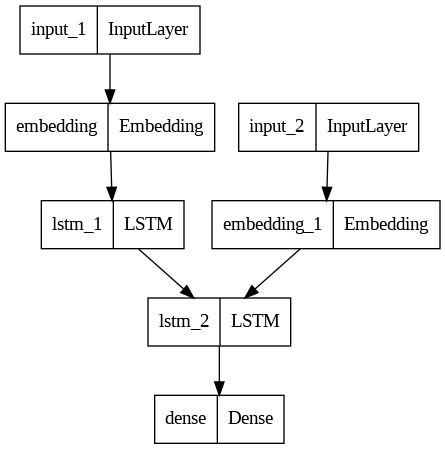

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', )

In [ ]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=3)

history = model.fit(x = [encoder_input_train, decoder_input_train],
          y = decoder_target_train,

          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size = BATCH_SIZE,
          callbacks = [earlystopping],
          epochs = EPOCHS)

Epoch 1/100
465/465 [==============================] - 119s 248ms/step - loss: 2.7189 - acc: 0.5698 - val_loss: 2.1936 - val_acc: 0.6403
Epoch 2/100
465/465 [==============================] - 118s 255ms/step - loss: 2.0568 - acc: 0.6477 - val_loss: 1.9637 - val_acc: 0.6652
Epoch 3/100
465/465 [==============================] - 114s 244ms/step - loss: 1.7952 - acc: 0.6782 - val_loss: 1.7249 - val_acc: 0.6942
Epoch 4/100
465/465 [==============================] - 115s 247ms/step - loss: 1.5594 - acc: 0.7098 - val_loss: 1.5548 - val_acc: 0.7184
Epoch 5/100
465/465 [==============================] - 113s 242ms/step - loss: 1.3902 - acc: 0.7311 - val_loss: 1.4531 - val_acc: 0.7329
Epoch 6/100
465/465 [==============================] - 113s 244ms/step - loss: 1.2588 - acc: 0.7491 - val_loss: 1.3641 - val_acc: 0.7486
Epoch 7/100
465/465 [==============================] - 111s 239ms/step - loss: 1.1463 - acc: 0.7658 - val_loss: 1.2932 - val_acc: 0.7612
Epoch 8/100
465/465 [====================

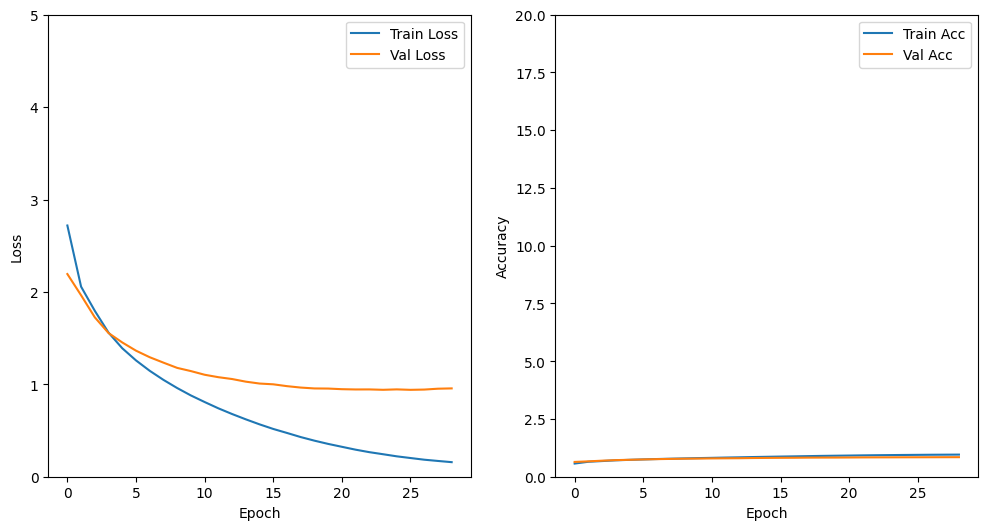

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(12, 6))

  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Loss')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'],
           label='Train Acc')
  plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Val Acc')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

## Inference

- 학습된 모델을 바탕으로 번역기를 만들어봅시다. -> 즉 inference용 번역기

- *교사 강요(teacher forcing)*를 사용하기 못하는 것을 제외하고는 훈련 루프와 비슷합니다. 각 마지막 시점(time step)에서 이전 디코더 인코더의 결과와 은닉 상태(hidden state)를 가진 예측 값을 디코더에 입력합니다.

    1. 번역하고자 하는 입력 문장이 인코더로 입력되어 인코더의 마지막 시점의 은닉 상태와 셀 상태를 얻습니다.
    2. 인코더의 은닉 상태와 셀 상태, 그리고 토큰 <sos>를 디코더로 보냅니다.
    3. 디코더가 토큰 <eos>가 나올 때까지 다음 단어를 예측하는 행동을 반복합니다.

In [ ]:
# 인코더 - 훈련과 동일
encoder_model = Model(encoder_inputs, encoder_states)

In [ ]:
encoder_input_train[0:1]

array([[ 23, 250,  17,   3,  27,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=int32)

In [ ]:
# 인코더 모델 확인
ht, ct = encoder_model(encoder_input_train[0:1])
ht.shape, ct.shape

(TensorShape([1, 256]), TensorShape([1, 256]))

In [ ]:
# 디코더 (Predict)

# Input Tensors : 이전 시점의 상태를 보관할 텐서
decoder_input_h = Input(shape=(HIDDEN_DIM,))
decoder_input_c = Input(shape=(HIDDEN_DIM,))

decoder_states_inputs = [decoder_input_h, decoder_input_c]

# 훈련 때 사용했던 임베딩 층을 재사용
x = dec_emb_layer(decoder_inputs)

# 다음 단어 예측을 위해 이전 시점의 상태를 현 시점의 초기 상태로 사용
x, state_h2, state_c2 = decoder_lstm(x, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]

# 모든 시점에 대해서 단어 예측 (Fully Connected)
x = decoder_dense(x)

# 수정된 디코더
decoder_model = Model(
    inputs = [decoder_inputs] + decoder_states_inputs,
    outputs = [x] + decoder_states2)

In [ ]:
temp_h = np.random.rand(1, 256)
temp_c = np.random.rand(1, 256)

In [ ]:
x, h, c = decoder_model([decoder_input_train[0:1], temp_h, temp_c])

In [ ]:
x.shape

TensorShape([1, 8, 4483])

In [ ]:
h.shape

TensorShape([1, 256])

In [ ]:
c.shape

TensorShape([1, 256])

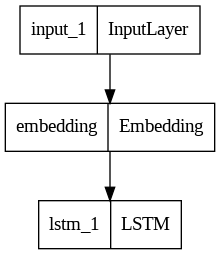

In [ ]:
# 인코더 모델 시각화
tf.keras.utils.plot_model(encoder_model)

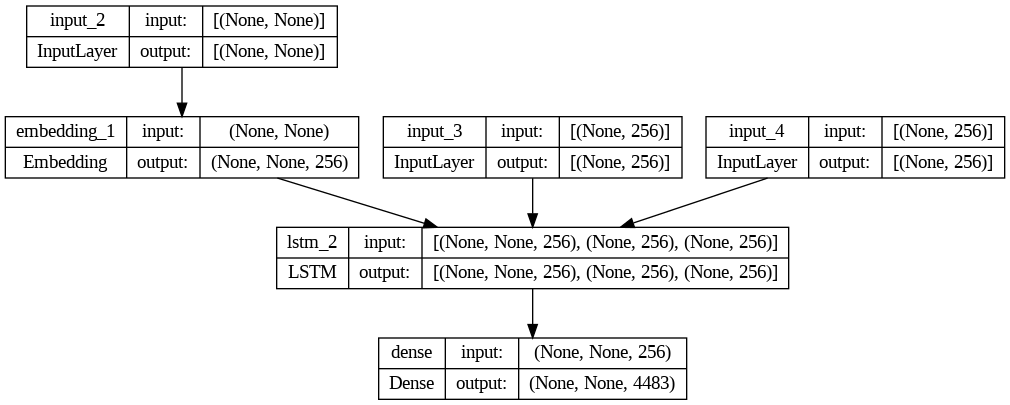

In [ ]:
# 디코더 모델 시각화
tf.keras.utils.plot_model(decoder_model, show_shapes = True)

테스트 단계에서의 동작을 위한 decode_sequence 함수를 구현합니다.
1. 입력 문장이 들어오면 인코더는 마지막 시점까지 전개하여 마지막 시점의 은닉 상태와 셀 상태를 리턴합니다. -> `states_value`
2. 디코더의 초기 입력으로 <SOS>를 준비합니다. -> `target_seq`
3. 이 두 가지 입력을 가지고 while문 안으로 진입하여 이 두 가지를 디코더의 입력으로 사용합니다.
4. 이제 디코더는 현재 시점에 대해서 예측합니다.
    - 예측 벡터로부터 현재 시점의 예측 단어인 target_seq를 얻고, h와 c 이 두 개의 값은 states_value에 저장합니다.
    - while문의 다음 루프. 즉, 두번째 시점의 디코더의 입력으로 다시 target_seq와 states_value를 사용합니다.
    - 이를 현재 시점의 예측 단어로 <eos>를 예측하거나 번역 문장의 길이가 50이 넘는 순간까지 반복합니다.
5. 각 시점마다 번역된 단어는 decoded_sentence에 누적하여 저장하였다가 최종 번역 시퀀스로 리턴합니다.

In [ ]:
sentence = 'Je lui ai prêté un CD.'

sentence = preprocess_sentence(sentence)
tokens = sentence.split(" ")
print('token :', tokens)

token : ['je', 'lui', 'ai', 'prete', 'un', 'cd', '.']


In [ ]:
# 입력 문장 토큰 -> 라벨링
enc_input = tokenizer_enc.texts_to_sequences([tokens])
print('enc_input: ', enc_input)
# 입력 문장 라벨링 -> 패딩
enc_input = tf.keras.preprocessing.sequence.pad_sequences(enc_input, maxlen=MAX_ENC_LEN, padding='post')
print('enc_input: ', enc_input)

enc_input:  [[2, 96, 14, 303, 22, 2142, 1]]
enc_input:  [[   2   96   14  303   22 2142    1    0    0    0    0    0    0    0
     0]]


In [ ]:
states_value = encoder_model.predict(enc_input)

1/1 [==============================] - 0s 462ms/step


In [ ]:
states_value[0].shape, states_value[1].shape

((1, 256), (1, 256))

In [ ]:
# Decoder input인 <SOS>에 해당하는 정수 생성
target_seq = np.zeros((1,1))
target_seq[0, 0] = tar2idx['<sos>']


# prediction 시작
    # stop_condition이 True가 될 때까지 루프 반복
    # 구현의 간소화를 위해서 이 함수는 배치 크기를 1로 가정합니다.
stop_condition = False
decoded_sentence = ''

for t in range(MAX_DEC_LEN):

    # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
    output_tokens, h, c = decoder_model.predict([target_seq] + states_value, verbose = 0)

    # 예측 결과를 단어로 변환
    result_token_index = np.argmax(output_tokens[0, -1, :])
    result_word = idx2tar[result_token_index]

    # 현재 시점의 예측 단어를 예측 문장에 추가
    decoded_sentence += ' '+result_word

    # 현재 시점의 예측 결과 -> 다음 시점의 입력으로 업데이트
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = result_token_index

    # 현재 시점의 상태 ->  다음 시점의 상태로 업데이트
    states_value = [h, c]

    #  Stop condition <eos>에 도달하면 중단.
    if result_word == '<eos>':
        break


print(decoded_sentence.strip(' <eos>'))

i lent him a cd .


In [ ]:
def translate(sentence):
    sentence = preprocess_sentence(sentence)
    tokens = sentence.split(" ")

    # 입력 문장 토큰 -> 라벨링
    enc_input = tokenizer_enc.texts_to_sequences([tokens])

    # 입력 문장 라벨링 -> 패딩
    enc_input = tf.keras.preprocessing.sequence.pad_sequences(enc_input, maxlen=MAX_ENC_LEN, padding='post')
    states_value = encoder_model.predict(enc_input)

    # Decoder input인 <SOS>에 해당하는 정수 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar2idx['<sos>']


    # prediction 시작
        # stop_condition이 True가 될 때까지 루프 반복
        # 구현의 간소화를 위해서 이 함수는 배치 크기를 1로 가정합니다.
    stop_condition = False
    decoded_sentence = ''

    for t in range(MAX_DEC_LEN):

        # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value, verbose = 0)

        # 예측 결과를 단어로 변환
        result_token_index = np.argmax(output_tokens[0, -1, :])
        result_word = idx2tar[result_token_index]

        # 현재 시점의 예측 단어를 예측 문장에 추가
        decoded_sentence += ' '+result_word

        # 현재 시점의 예측 결과 -> 다음 시점의 입력으로 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = result_token_index

        # 현재 시점의 상태 ->  다음 시점의 상태로 업데이트
        states_value = [h, c]

        #  Stop condition <eos>에 도달하면 중단.
        if result_word == '<eos>':
            break

    return decoded_sentence.strip(' <eos>')

## 결과 확인

결과 확인을 위한 함수를 만듭니다.

In [ ]:
train_idx = indices[:-n_of_val]
test_idx = indices[-n_of_val:]

In [ ]:
n_samples = 5
np.random.choice(train_idx, n_samples)

array([ 9176, 10853, 21204, 19654, 23896])

In [ ]:
# train data - translate
n_samples = 5
for idx in np.random.choice(train_idx, n_samples):
    test_sentence = fra_corpus[idx]
    answer_sentence = eng_corpus[idx]
    decoded_sentence = translate(test_sentence)

    print("입력문장 :", test_sentence)
    print("정답문장 :", answer_sentence)
    print("번역문장 :", decoded_sentence)
    print("-"*50)

1/1 [==============================] - 0s 26ms/step
입력문장 : C'est de l'argent facile.
정답문장 : It's easy money.
번역문장 : it s dark on time .
--------------------------------------------------
1/1 [==============================] - 0s 17ms/step
입력문장 : Je ne peux pas te le montrer.
정답문장 : I can't show you.
번역문장 : i can t blame you .
--------------------------------------------------
1/1 [==============================] - 0s 19ms/step
입력문장 : Avez-vous l'heure ?
정답문장 : What time is it?
번역문장 : have you eaten yet ?
--------------------------------------------------
1/1 [==============================] - 0s 16ms/step
입력문장 : Je vis confortablement.
정답문장 : I live in comfort.
번역문장 : i live in japan .
--------------------------------------------------
1/1 [==============================] - 0s 16ms/step
입력문장 : Il fit du bon boulot.
정답문장 : He did a good job.
번역문장 : he made him rich .
--------------------------------------------------


In [ ]:
# test data - translate
n_samples = 5
for idx in np.random.choice(test_idx, n_samples):
    test_sentence = fra_corpus[idx]
    answer_sentence = eng_corpus[idx]
    decoded_sentence = translate(test_sentence)

    print("입력문장 :", test_sentence)
    print("정답문장 :", answer_sentence)
    print("번역문장 :", decoded_sentence)
    print("-"*50)

1/1 [==============================] - 0s 17ms/step
입력문장 : Ils ont tué Tom.
정답문장 : They murdered Tom.
번역문장 : they killed tom .
--------------------------------------------------
1/1 [==============================] - 0s 17ms/step
입력문장 : Je suis très fatigué.
정답문장 : I am very tired.
번역문장 : i m very tired .
--------------------------------------------------
1/1 [==============================] - 0s 17ms/step
입력문장 : J'ai vraiment faim.
정답문장 : I'm really hungry.
번역문장 : i m really sleepy .
--------------------------------------------------
1/1 [==============================] - 0s 17ms/step
입력문장 : Je suis heureux de vous rencontrer.
정답문장 : Nice to meet you.
번역문장 : nice to work .
--------------------------------------------------
1/1 [==============================] - 0s 17ms/step
입력문장 : J'ai vraiment faim.
정답문장 : I'm really hungry.
번역문장 : i m really sleepy .
--------------------------------------------------


## BLEU Score (Bilingual Evaluation Understudy Score)
기계 번역의 성능이 얼마나 뛰어난가를 측정하기 위해 사용되는 대표적인 방법 중 하나인 BLEU(Bilingual Evaluation Understudy)를 측정해봅시다.
- 논문 : BLEU: a Method for Automatic Evaluation of Machine Translation
- BLEU 점수는 기계 번역된 텍스트와 고품질 참조 번역 세트의 유사성을 측정하는 0과 1 사이의 숫자입니다.
    - 값이 0이면 기계 번역된 출력이 참조 번역과 겹치는 부분이 없는 것을 의미하고(저품질)
    - 1이면 참조 번역과 완벽하게 겹치는 것을 의미합니다(고품질)

- BLEU 설명
    - https://jrc-park.tistory.com/273
    - https://wikidocs.net/31695
    - https://cloud.google.com/translate/automl/docs/evaluate?hl=ko#bleu

BLEU는 기계 번역 결과와 사람이 직접 번역한 결과가 얼마나 유사한지 비교하여 번역에 대한 성능을 측정하는 방법입니다.

In [ ]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 14.0 MB/s eta 0:00:00


In [ ]:
import evaluate
bleu = evaluate.load("bleu")
bleu

EvaluationModule(name: "bleu", module_type: "metric", features: [{'predictions': Value(dtype='string', id='sequence'), 'references': Sequence(feature=Value(dtype='string', id='sequence'), length=-1, id='references')}, {'predictions': Value(dtype='string', id='sequence'), 'references': Value(dtype='string', id='sequence')}], usage: """
Computes BLEU score of translated segments against one or more references.
Args:
    predictions: list of translations to score.
    references: list of lists of or just a list of references for each translation.
    tokenizer : approach used for tokenizing `predictions` and `references`.
        The default tokenizer is `tokenizer_13a`, a minimal tokenization approach that is equivalent to `mteval-v13a`, used by WMT.
        This can be replaced by any function that takes a string as input and returns a list of tokens as output.
    max_order: Maximum n-gram order to use when computing BLEU score.
    smooth: Whether or not to apply Lin et al. 2004 smoot

In [ ]:
bleu

EvaluationModule(name: "bleu", module_type: "metric", features: [{'predictions': Value(dtype='string', id='sequence'), 'references': Sequence(feature=Value(dtype='string', id='sequence'), length=-1, id='references')}, {'predictions': Value(dtype='string', id='sequence'), 'references': Value(dtype='string', id='sequence')}], usage: """
Computes BLEU score of translated segments against one or more references.
Args:
    predictions: list of translations to score.
    references: list of lists of or just a list of references for each translation.
    tokenizer : approach used for tokenizing `predictions` and `references`.
        The default tokenizer is `tokenizer_13a`, a minimal tokenization approach that is equivalent to `mteval-v13a`, used by WMT.
        This can be replaced by any function that takes a string as input and returns a list of tokens as output.
    max_order: Maximum n-gram order to use when computing BLEU score.
    smooth: Whether or not to apply Lin et al. 2004 smoot

In [ ]:
import evaluate
predictions = ["hello there general kenobi", "foo bar foobar"]
references = [
    ["hello there general kenobi", "hello there !"],
    ["foo bar foobar"]
 ]

bleu = evaluate.load("bleu")

results = bleu.compute(predictions=predictions, references=references)

print(results)

{'bleu': 1.0, 'precisions': [1.0, 1.0, 1.0, 1.0], 'brevity_penalty': 1.0, 'length_ratio': 1.1666666666666667, 'translation_length': 7, 'reference_length': 6}


In [ ]:
results

{'bleu': 1.0,
 'precisions': [1.0, 1.0, 1.0, 1.0],
 'brevity_penalty': 1.0,
 'length_ratio': 1.1666666666666667,
 'translation_length': 7,
 'reference_length': 6}

In [ ]:
from tqdm.notebook import tqdm

n_samples = 10
ref_train, pred_train = [], []
for idx in tqdm(np.random.choice(test_idx, n_samples)):
    ref_train.append(eng_corpus[idx])
    pred_train.append(translate(fra_corpus[idx]))


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


In [ ]:
print(ref_train)
print(pred_train)

['I tried to do it.', 'They crashed.', 'Is it true?', "Where's the catch?", 'I forgot.', 'Did you see anyone?', 'Tom began talking.', "Tom'll understand.", 'I kept on talking.', 'How much are they?']
['i tried to do it .', 'they re dead .', 'no kidding ?', 'what s wrong ?', 'i ve forgotten .', 'did you buy them ?', 'tom took cover .', 'tom s staying .', 'i kept on singing .', 'how much are they ?']


In [ ]:
bleu.compute(predictions=pred_train, references=ref_train)

{'bleu': 0.26286640923261334,
 'precisions': [0.45454545454545453,
  0.23529411764705882,
  0.20833333333333334,
  0.21428571428571427],
 'brevity_penalty': 1.0,
 'length_ratio': 1.0476190476190477,
 'translation_length': 44,
 'reference_length': 42}

### Reference

- https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html
- https://wikidocs.net/86900